In [1]:
from bs4 import BeautifulSoup
import requests
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.ptt.cc/'
#下面的網址可填入任何一個版，我是以e-shopping版、graduate版、PhD和AfterPhD版為基準
web = requests.get('https://www.ptt.cc/bbs/e-shopping/index.html', cookies={'over18':'1'})
#第一關保險：預置Cookies作為通關密碼
soup = BeautifulSoup(web.text, "html.parser")
titles = soup.find_all('div', class_='title')   
# 取得 class 為 title 的 div 內容
# 基本參數
payload = {
    'from': '/bbs/Gossiping/index.html',
    'yes': 'yes'
}
data = []   # 全部文章的資料
num = 0
#第二關保險：用session紀錄cookie訊息
rs = requests.session()
response = rs.post("https://www.ptt.cc/ask/over18", data=payload)

In [3]:
urls = '' # 建立代表所有網址(但沒有分行)的urls變數
for i in range(10): #讀取幾頁的網址，這裡是10頁
    for i in titles:
            urls = urls + url + i.find('a')['href'] + '\n'
            web = "https://www.ptt.cc"+soup.find("a", string="‹ 上頁")["href"]
            #迴圈結束時按下上一頁按鈕，次數同迴圈圈數

In [4]:
urlsList = urls.split('\n') #將所有要找尋的網址以\n為基準分段、並存成一維陣列

In [5]:
hourList=[]
for i in range(len(urlsList)-2):
    page_url = urlsList[i]
    response = rs.get(page_url)
    result = BeautifulSoup(response.text, "html.parser")
    #print(result.prettify())
    # 找出作者、標題、時間、留言
    main_content = result.find("div", id="main-content")
    article_info = main_content.find_all("span",class_="article-meta-value")
    #將函數存成時間字串
    time = article_info[3].string
    time_obj = datetime.datetime.strptime(time, '%a %b %d %H:%M:%S %Y')
    hour_str = time_obj.strftime('%H')
    hourList.append(hour_str)

In [6]:
hourList

['16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '01',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '01',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '01',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '01',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '01',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '01',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '01',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',
 '15',
 '16',
 '20',
 '21',
 '01',
 '13',
 '16',
 '14',
 '08',
 '04',
 '16',
 '17',
 '19',
 '19',
 '21',
 '11',
 '14',

In [7]:
import pandas as pd

# 將 hourList 轉換為 Pandas Series
hourSeries = pd.Series(hourList)

# 使用 value_counts() 方法計算每個小時出現的次數
hourCounts = hourSeries.value_counts()

print(hourCounts)

16    30
19    20
21    20
14    20
17    10
11    10
15    10
20    10
01    10
13    10
08    10
04     9
dtype: int64


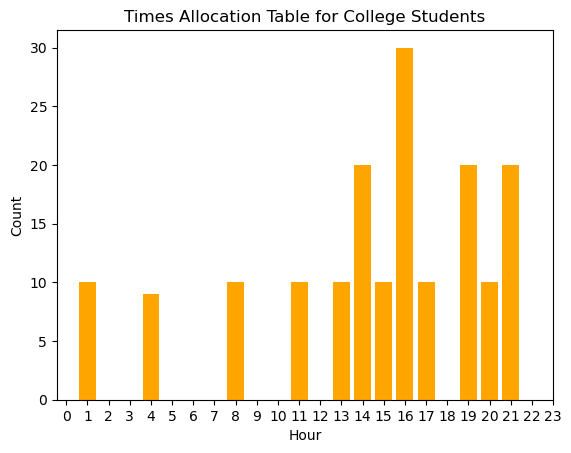

In [8]:
# 繪製長條圖，可用color=''修改顏色
plt.bar(hourCounts.index.astype(int), hourCounts.values, color='orange')

# 設置圖表標題和軸標籤
plt.title('Times Allocation Table for College Students')
plt.xlabel('Hour')
plt.ylabel('Count')

# 設置 X 軸刻度
plt.xticks(range(0, 24))

# 顯示圖表
plt.show()

In [9]:
#純爬蟲的部分大致在上面，我將數據轉成csv與json放在下面
hourList=[]
df = {'title':[],'author':[],'time':[]}
for i in range(len(urlsList)-2):
    page_url = urlsList[i]
    response = rs.get(page_url)
    result = BeautifulSoup(response.text, "html.parser")
    #print(result.prettify())
    main_content = result.find("div", id="main-content")
    article_info = main_content.find_all("span",class_="article-meta-value")
    #將函數存成時間、標題、作者
    time = article_info[3].string
    title = article_info[2].string
    author = article_info[0].string
    print(title,author,time)
    df.get('title').append([title])
    df.get('author').append([author])
    df.get('time').append([time])

[問題] 淘寶 玉山銀行認證失敗 supermars (  -Super Mars-) Mon Apr 17 16:13:04 2023
[挑選] 無鋼圈內衣挑選 Qmomo、On street、華歌 babyjou (我想要當大富翁) Mon Apr 17 17:45:49 2023
[心得] 妞新聞2023面膜禮盒 japan0724 (您好 我是阿丸仔) Mon Apr 17 19:48:24 2023
[問題] 一頁式廣告後續來電用意 geniustu (偷天才子) Mon Apr 17 19:53:18 2023
[情報] 2023年天貓超來電主會場 立減13% jaxchang (Jax) Mon Apr 17 21:04:04 2023
[挑選] rm水桶包選擇(內有選手 s0912838248 (teemoYA) Tue Apr 18 11:23:08 2023
[挑選] 富士or理光類單眼 FTFish (FTF) Tue Apr 18 14:12:06 2023
[連線] 04/18 日貨連線 aasel (sometimes) Tue Apr 18 15:31:37 2023
[問題] 男生貼身內褲會不會有上捲困擾? atungtung (蒙那麗莎的偽笑) Tue Apr 18 16:45:43 2023
[心得] SIROCA洗碗機 SS-MH351W（桌上型免安裝） corone (corone) Tue Apr 18 20:32:08 2023
[閒聊] 4/18韓貨韓組閒聊文 iayou (小P) Tue Apr 18 21:30:36 2023
[問題] KLOOK退款時間 clipo (clipo) Wed Apr 19 01:39:19 2023
[公告] e-shopping 板規     （2023/02/13更新） weifish (Once upon a time) Mon Feb 14 13:47:24 2022
[公告] 請留意縮址可能內含紅利連結 weifish (Once upon a time) Thu Feb 17 16:47:27 2022
[公告] 修正紅利連結板規 weifish (Once upon a time) Tue Sep 13 14:00:22 2022
[公告] 一月底前禁淘樂集運相關文章 

[挑選] 富士or理光類單眼 FTFish (FTF) Tue Apr 18 14:12:06 2023
[連線] 04/18 日貨連線 aasel (sometimes) Tue Apr 18 15:31:37 2023
[問題] 男生貼身內褲會不會有上捲困擾? atungtung (蒙那麗莎的偽笑) Tue Apr 18 16:45:43 2023
[心得] SIROCA洗碗機 SS-MH351W（桌上型免安裝） corone (corone) Tue Apr 18 20:32:08 2023
[閒聊] 4/18韓貨韓組閒聊文 iayou (小P) Tue Apr 18 21:30:36 2023
[問題] KLOOK退款時間 clipo (clipo) Wed Apr 19 01:39:19 2023
[公告] e-shopping 板規     （2023/02/13更新） weifish (Once upon a time) Mon Feb 14 13:47:24 2022
[公告] 請留意縮址可能內含紅利連結 weifish (Once upon a time) Thu Feb 17 16:47:27 2022
[公告] 修正紅利連結板規 weifish (Once upon a time) Tue Sep 13 14:00:22 2022
[公告] 一月底前禁淘樂集運相關文章 weifish (Once upon a time) Thu Dec 15 08:51:36 2022
[公告] 置底推文違規區 2023年1月  flerow (Ly's M) Sun Jan 22 04:55:11 2023
[問題] 淘寶 玉山銀行認證失敗 supermars (  -Super Mars-) Mon Apr 17 16:13:04 2023
[挑選] 無鋼圈內衣挑選 Qmomo、On street、華歌 babyjou (我想要當大富翁) Mon Apr 17 17:45:49 2023
[心得] 妞新聞2023面膜禮盒 japan0724 (您好 我是阿丸仔) Mon Apr 17 19:48:24 2023
[問題] 一頁式廣告後續來電用意 geniustu (偷天才子) Mon Apr 17 19:53:18 2023
[情報] 2023年天貓超來電

In [10]:
#轉成 DataFrame
df = pd.DataFrame(df)
df

,title,author,time
0,[[問題] 淘寶 玉山銀行認證失敗],[supermars ( -Super Mars-)],[Mon Apr 17 16:13:04 2023]
1,[[挑選] 無鋼圈內衣挑選 Qmomo、On street、華歌],[babyjou (我想要當大富翁)],[Mon Apr 17 17:45:49 2023]
2,[[心得] 妞新聞2023面膜禮盒],[japan0724 (您好 我是阿丸仔)],[Mon Apr 17 19:48:24 2023]
3,[[問題] 一頁式廣告後續來電用意],[geniustu (偷天才子)],[Mon Apr 17 19:53:18 2023]
4,[[情報] 2023年天貓超來電主會場 立減13%],[jaxchang (Jax)],[Mon Apr 17 21:04:04 2023]
...,...,...,...
164,[[問題] KLOOK退款時間],[clipo (clipo)],[Wed Apr 19 01:39:19 2023]
165,[[公告] e-shopping 板規 （2023/02/13更新）],[weifish (Once upon a time)],[Mon Feb 14 13:47:24 2022]
166,[[公告] 請留意縮址可能內含紅利連結],[weifish (Once upon a time)],[Thu Feb 17 16:47:27 2022]
167,[[公告] 修正紅利連結板規],[weifish (Once upon a time)],[Tue Sep 13 14:00:22 2022]


In [11]:
#輸出EXCEL檔
df.to_csv('Excel_df.csv')
print("csv輸出成功")

csv輸出成功


In [13]:
df = df.to_json()
#轉為json檔
with open('json_df.json', 'w', encoding='utf-8') as file:
    json.dump(df, file, ensure_ascii=False)  

print("json輸出成功")

json輸出成功
